# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Model selection

In this jupyter notebook, we will train different types of machine learning algorithms to compare them and choose the right one for future evaluation. Algorithms are trained only on a subset of data. The chosen algorithm will be used in modeling and evaluation phase, trained on all training data. Using that algorithm, we will evaluate the power and advantages of nature inspired algorithms in case of feature selection (to solve our main problem with a lot of features in transactions fraud detection with machine learning).

### Setup and reading the data

At first, we need to import libraries and set initial configs.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

# Supress libraries deprecation import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from src.dataset import load_processed_data
from src.evaluation import custom_classification_report

Machine learning algorithms will be trained on only 20% of data:

In [4]:
x_train, y_train, x_test, y_test = load_processed_data(frac=0.2)

Number of records:
  x_train - 94486
  y_train - 94486
  x_test - 23621
  y_test - 23621


### Training machine learning algorithms

Different types of algorithms will be trained with default parameters:

* decision tree
* random forest
* logistic regression
* linear SVC
* Gaussian naive Bayes

All of the algorithms are based on very different ways of how the learning and classification is performed. Trying different approaches should help us to find the best fitting type of algorithm for our problem.

#### Decision tree

In [5]:
%%time

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

CPU times: user 17.2 s, sys: 47.6 ms, total: 17.2 s
Wall time: 17.2 s


not fraud
precision: 0.9769004435466163
recall: 0.9793088267664539
f1-score: 0.9781031526183881
support: 22715


is fraud
precision: 0.4470588235294118
recall: 0.4194260485651214
f1-score: 0.4328018223234624
support: 906


accuracy: 0.9578341306464586


macro avg
precision: 0.7119796335380141
recall: 0.6993674376657877
f1-score: 0.7054524874709253
support: 23621


weighted avg
precision: 0.9565779970906836
recall: 0.9578341306464586
f1-score: 0.9571877381462149
support: 23621


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
micro: 0.7119796335380141
macro: 0.7119796335380141
samples: 0.7119796335380141
weighted: 0.7119796335380141




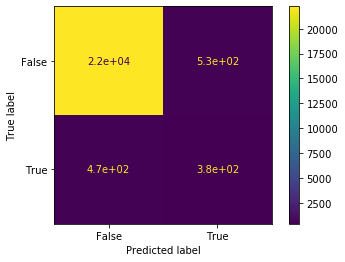

In [6]:
custom_classification_report(clf, x_test, y_test)

#### Random forest

In [7]:
%%time

clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

CPU times: user 55.9 s, sys: 43.4 ms, total: 55.9 s
Wall time: 55.9 s


not fraud
precision: 0.9978042246717316
recall: 0.9761137603643081
f1-score: 0.9868398193189715
support: 23277


is fraud
precision: 0.3458823529411765
recall: 0.8546511627906976
f1-score: 0.4924623115577889
support: 344


accuracy: 0.974344862622243


macro avg
precision: 0.671843288806454
recall: 0.9153824615775028
f1-score: 0.7396510654383802
support: 23621


weighted avg
precision: 0.9883100828540562
recall: 0.974344862622243
f1-score: 0.9796400452759653
support: 23621


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
micro: 0.671843288806454
macro: 0.671843288806454
samples: 0.671843288806454
weighted: 0.671843288806454




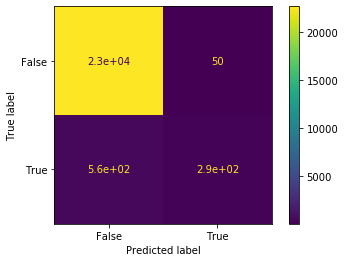

In [8]:
custom_classification_report(clf, x_test, y_test)

#### Logistic regression

In [9]:
%%time

clf = LogisticRegressionCV()
clf = clf.fit(x_train, y_train)

CPU times: user 12min 25s, sys: 3min 6s, total: 15min 31s
Wall time: 4min 13s


not fraud
precision: 0.9987264503096043
recall: 0.9701390666325399
f1-score: 0.9842252180122475
support: 23442


is fraud
precision: 0.17647058823529413
recall: 0.8379888268156425
f1-score: 0.29154518950437325
support: 179


accuracy: 0.9691376317683418


macro avg
precision: 0.5875985192724492
recall: 0.9040639467240912
f1-score: 0.6378852037583104
support: 23621


weighted avg
precision: 0.992495393228562
recall: 0.9691376317683418
f1-score: 0.97897608693808
support: 23621


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
micro: 0.5875985192724492
macro: 0.5875985192724492
samples: 0.5875985192724492
weighted: 0.5875985192724492




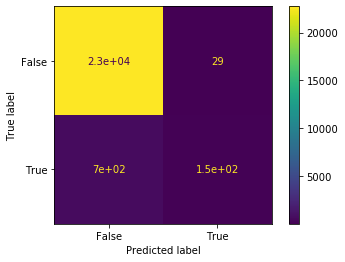

In [10]:
custom_classification_report(clf, x_test, y_test)

#### Linear SVC

In [11]:
%%time

clf = LinearSVC()
clf = clf.fit(x_train, y_train)

CPU times: user 2min 12s, sys: 261 ms, total: 2min 12s
Wall time: 2min 12s


not fraud
precision: 0.9960915199156822
recall: 0.9686952808029041
f1-score: 0.9822023989953667
support: 23415


is fraud
precision: 0.1376470588235294
recall: 0.5679611650485437
f1-score: 0.22159090909090906
support: 206


accuracy: 0.9652004572202701


macro avg
precision: 0.5668692893696058
recall: 0.7683282229257239
f1-score: 0.6018966540431379
support: 23621


weighted avg
precision: 0.9886049800153822
recall: 0.9652004572202701
f1-score: 0.975569065651295
support: 23621


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
micro: 0.5668692893696059
macro: 0.5668692893696059
samples: 0.5668692893696059
weighted: 0.5668692893696059




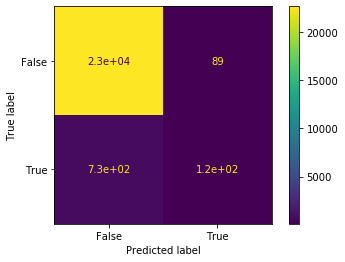

In [12]:
custom_classification_report(clf, x_test, y_test)

#### Gaussian Naive Bayes

In [13]:
%%time

clf = GaussianNB()
clf = clf.fit(x_train, y_train)

CPU times: user 466 ms, sys: 100 ms, total: 566 ms
Wall time: 566 ms


not fraud
precision: 0.0308286856088885
recall: 0.9831932773109243
f1-score: 0.05978284011070897
support: 714


is fraud
precision: 0.9858823529411764
recall: 0.03658270397695028
f1-score: 0.07054762806751695
support: 22907


accuracy: 0.06519622369925067


macro avg
precision: 0.5083555192750324
recall: 0.5098879906439373
f1-score: 0.06516523408911296
support: 23621


weighted avg
precision: 0.9570136209452721
recall: 0.06519622369925067
f1-score: 0.07022223716107096
support: 23621


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
micro: 0.5083555192750324
macro: 0.5083555192750324
samples: 0.5083555192750324
weighted: 0.5083555192750324




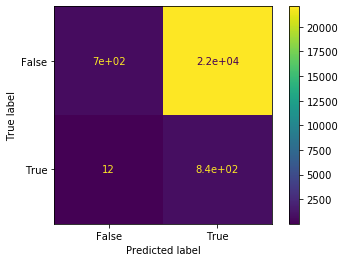

In [14]:
custom_classification_report(clf, x_test, y_test)

### Conclusion

In this jupyter notebook, we have trained several machine algorithms on subset of data to choose the appropriate one for our problem. All of tried algorithms are based on very different ways of how the learning and classification is performed.

According to classification results, the tree-based algorithms (decision tree or random forest) seem to be the best fitting. Best results have been achieved by random forest classifier. Not only did these algorithms achieve the best results, but also their training was very fast (except for naive Bayes, but it achieved bad results). The speed of training is very important for next phase (evaluation) where nature inspired algorithms will be used for feature selection. When using nature inspired algorithms, usually the machine learning algorithm will be trained many times, so fast training is very important.